In [1]:
import ROOT
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


Welcome to JupyROOT 6.24/04


In [2]:
gluex_markers = {
    8: ROOT.kFullCircle,
    9: ROOT.kFullSquare,
    10: ROOT.kFullTriangleUp,
    11: ROOT.kFullDiamond
}

theory_markers = {
    8: ROOT.kFullDotLarge,
    9: ROOT.kFullDotLarge,
    10: ROOT.kOpenTriangleUp,
    11: ROOT.kOpenDiamond
}

pipkmks_colors = {
    8: ROOT.kBlue,
    9: ROOT.kBlue+1,
    10: ROOT.kBlue+2,
    11: ROOT.kBlue+3
}

pimkpks_colors = {
    8: ROOT.kRed,
    9: ROOT.kRed+1,
    10: ROOT.kRed+2,
    11: ROOT.kRed+3
}

clas_colors = {
    2.45: ROOT.kOrange,
    2.55: ROOT.kOrange+1,
    2.65: ROOT.kOrange+2,
    2.75: ROOT.kOrange+3
}

clas_markers = {
    2.45: ROOT.kFullDiamond,
    2.55: ROOT.kFullSquare,
    2.65: ROOT.kFullTriangleUp,
    2.75: ROOT.kFullCircle
}

In [3]:
path_to_fit_result_files = '/work/halld/home/viducic/data/fit_params/{}/tf1_all_e_binned_t_values.csv'
path_to_errors_file = '/work/halld/home/viducic/systematic_errors/cs_all_e_binned_t_error.csv'
df_pipkmks = pd.read_csv(path_to_fit_result_files.format('pipkmks'))
df_pimkpks = pd.read_csv(path_to_fit_result_files.format('pimkpks'))
errors = pd.read_csv(path_to_errors_file)
# print(errors.columns)
pipkmks_errors = errors[errors['channel'] == 'pipkmks']
pimkpks_errors = errors[errors['channel'] == 'pimkpks']

In [4]:
df_pipkmks['t_bin_width_bars'] = df_pipkmks['t_bin_width']/2
df_pimkpks['t_bin_width_bars'] = df_pimkpks['t_bin_width']/2

In [5]:
pipkmks_graph = ROOT.TGraphAsymmErrors(len(df_pipkmks.t_bin_middle.to_numpy()), df_pipkmks.t_bin_middle.to_numpy(dtype='d'), df_pipkmks.cross_section.to_numpy(), df_pipkmks.t_bin_width_bars.to_numpy(), df_pipkmks.t_bin_width_bars.to_numpy(), pipkmks_errors.cs_error_down.to_numpy(), pipkmks_errors.cs_error_up.to_numpy())
pipkmks_graph.SetName(f'pipkmks')
pipkmks_graph.SetMarkerColor(ROOT.kBlue)
pipkmks_graph.SetMarkerStyle(ROOT.kFullCircle)
pipkmks_graph.SetLineColor(ROOT.kBlue)
pipkmks_graph.SetLineWidth(2)
pipkmks_graph.GetXaxis().SetTitle('-t [GeV^{2}]')
pipkmks_graph.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
pipkmks_graph.SetTitle('6.5 < E_{#gamma} >11.5 GeV')

In [6]:
pimkpks_graph = ROOT.TGraphAsymmErrors(len(df_pimkpks.t_bin_middle.to_numpy()), df_pimkpks.t_bin_middle.to_numpy(dtype='d'), df_pimkpks.cross_section.to_numpy(), df_pimkpks.t_bin_width_bars.to_numpy(), df_pimkpks.t_bin_width_bars.to_numpy(), pimkpks_errors.cs_error_down.to_numpy(), pimkpks_errors.cs_error_up.to_numpy())
pimkpks_graph.SetName(f'pimkpks')
pimkpks_graph.SetMarkerColor(ROOT.kRed)
pimkpks_graph.SetMarkerStyle(ROOT.kFullCircle)
pimkpks_graph.SetLineColor(ROOT.kRed)
pimkpks_graph.SetLineWidth(2)
pimkpks_graph.GetXaxis().SetTitle('-t [GeV^{2}]')
pimkpks_graph.GetYaxis().SetTitle('#frac{d#sigma}{dt} [nb/GeV^{2}]')
pimkpks_graph.SetTitle('6.5 < E_{#gamma} >11.5 GeV')

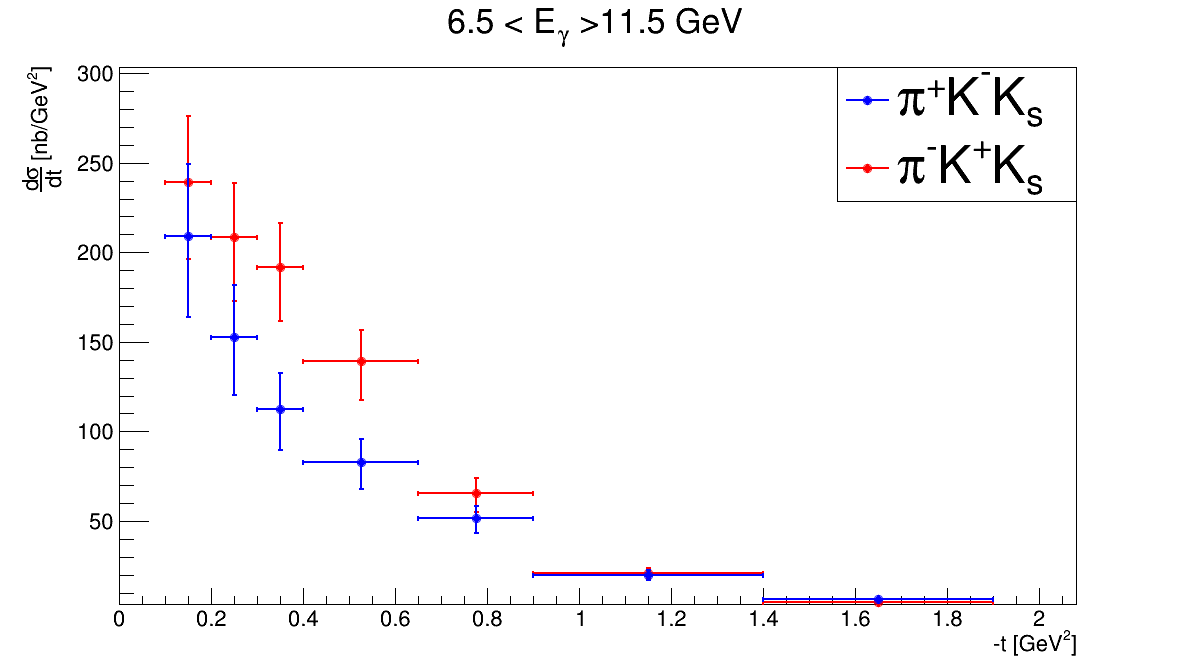

In [7]:
c = ROOT.TCanvas('c', 'c', 1200, 700)

integrated_energy_legend = ROOT.TLegend(0.7, 0.7, 0.9, 0.9)

integrated_energy_legend.AddEntry(pipkmks_graph, '#pi^{+}K^{-}K_{s}', 'lp')
integrated_energy_legend.AddEntry(pimkpks_graph, '#pi^{-}K^{+}K_{s}', 'lp')

pimkpks_graph.Draw('AP')
pipkmks_graph.Draw('P')
integrated_energy_legend.Draw()
c.Draw()

In [8]:
ratio = np.where(df_pipkmks.t_bin_middle == df_pimkpks.t_bin_middle, df_pimkpks.cross_section/df_pipkmks.cross_section, 0)

percent_error_up_pipkmks = pipkmks_errors.cs_error_up.to_numpy()/df_pipkmks.cross_section.to_numpy()
percent_error_down_pipkmks = pipkmks_errors.cs_error_down.to_numpy()/df_pipkmks.cross_section.to_numpy()
percent_error_up_pimkpks = pimkpks_errors.cs_error_up.to_numpy()/df_pimkpks.cross_section.to_numpy()
percent_error_down_pimkpks = pimkpks_errors.cs_error_down.to_numpy()/df_pimkpks.cross_section.to_numpy()

# error_up_pipkmks = pipkmks_errors.cs_error_up.to_numpy()
# error_down_pipkmks = pipkmks_errors.cs_error_down.to_numpy()
# error_up_pimkpks = pimkpks_errors.cs_error_up.to_numpy()
# error_down_pimkpks = pimkpks_errors.cs_error_down.to_numpy()
error_up = np.where(True, np.sqrt(percent_error_up_pipkmks**2 + percent_error_up_pimkpks**2), 0)
error_down = np.where(True, np.sqrt(percent_error_down_pipkmks**2 + percent_error_down_pimkpks**2), 0)

In [9]:
asym_graph = ROOT.TGraphAsymmErrors(len(df_pipkmks.t_bin_middle.to_numpy()), df_pipkmks.t_bin_middle.to_numpy(dtype='d'), ratio, df_pipkmks.t_bin_width_bars.to_numpy(), df_pipkmks.t_bin_width_bars.to_numpy(), error_down, error_up)

 FCN=12.4084 FROM MIGRAD    STATUS=CONVERGED      19 CALLS          20 TOTAL
                     EDM=4.52791e-08    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  p0           1.24658e+00   8.69307e-02   1.55429e-04   3.46171e-03


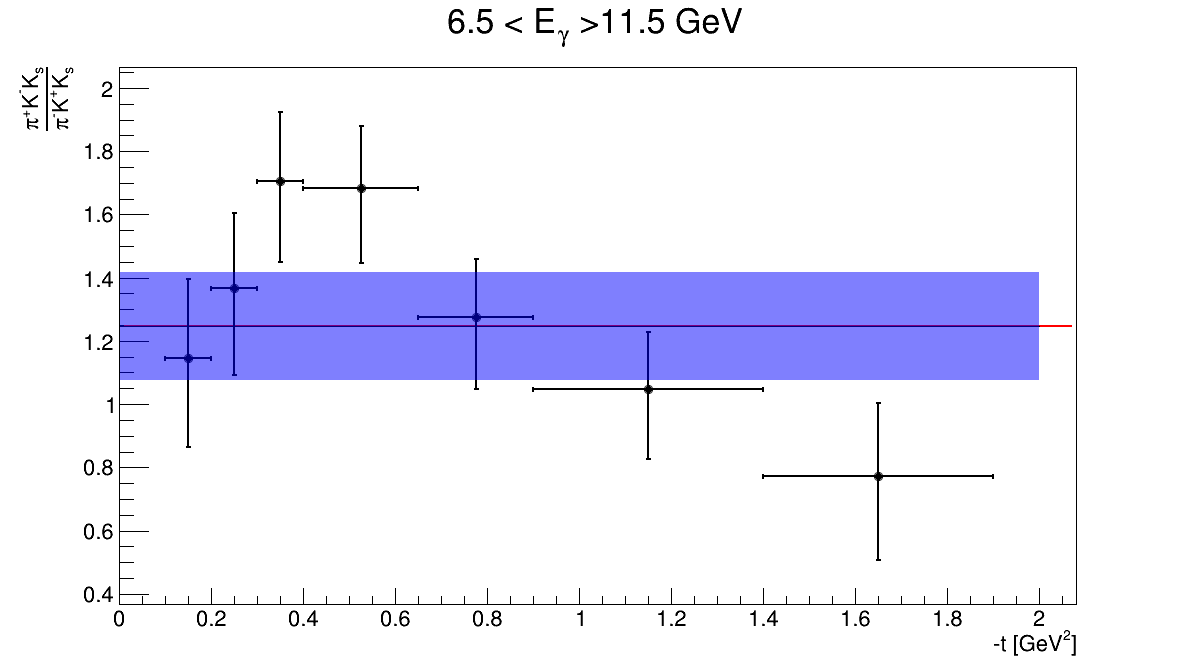

In [10]:
c.Clear()
asym_graph.SetMarkerColor(ROOT.kBlack)
asym_graph.SetMarkerStyle(ROOT.kFullCircle)
asym_graph.SetLineColor(ROOT.kBlack)
asym_graph.SetLineWidth(2)
asym_graph.GetXaxis().SetTitle('-t [GeV^{2}]')
asym_graph.GetYaxis().SetTitle('#frac{#pi^{+}K^{-}K_{s}}{#pi^{-}K^{+}K_{s}}')
asym_graph.SetTitle('6.5 < E_{#gamma} >11.5 GeV')

func = ROOT.TF1('func', '[0]', 0, 2)
asym_graph.Fit(func, 'S')
# TODO: plot uncertainty on the funciton as well
asym_graph.Draw('AP')

# confidence interval
hint = ROOT.TH1F('hint', 'hint', 1000, 0, 2)
ROOT.TVirtualFitter.GetFitter().GetConfidenceIntervals(hint)
hint.SetStats(0)
hint.SetFillColorAlpha(ROOT.kBlue, 0.5)
hint.Draw('E3 same')

c.Draw()